In [1]:
# imports
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Scraper
options = Options()
options.headless = True # uses chrome without opening a G.U.I.
options.add_argument("--window-size-=1920,1200") # set's window size. note really needed for what we're doing

# mac os path to chromedriver file
DRIVER_PATH = '/usr/local/bin/chromedriver' 

# windows os path to chrome driver file
# DRIVER_PATH = 'C:/path/to/chromedriver.exe'

# set up our driver with our preset options
driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)

# go to the site we want to scrape
driver.get('https://boxofficemojo.com/year/')

# scrape desired data
years = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[1]')
tot_grosses = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[2]')
tot_gross_changes = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[3]')
num_of_releases = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[4]')
avgs_per_release = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[5]')
top_movies = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[6]')

# convert scraped web elements into lists of data
years = [year.text for year in years]
tot_grosses = [tot_gross.text for tot_gross in tot_grosses]
tot_gross_changes = [tot_gross_change.text for tot_gross_change in tot_gross_changes]
num_of_releases = [num_of_release.text for num_of_release in num_of_releases]
avgs_per_release = [avg_per_release.text for avg_per_release in avgs_per_release]
top_movies = [top_movie.text for top_movie in top_movies]

# close our driver
driver.quit()

In [3]:
movies_df = pd.DataFrame({
    'top_movie_of_the_year' : top_movies,
    'year' : years,
    'total_gross' : tot_grosses,
    'change_in_total_gross(%)' : tot_gross_changes,
    'number_of_releases' : num_of_releases,
    'average_gross_per_release' : avgs_per_release,
})

movies_df

,top_movie_of_the_year,year,total_gross,change_in_total_gross(%),number_of_releases,average_gross_per_release
0,Bad Boys for Life,2020,"$1,798,410,543",-,284,"$6,332,431"
1,Avengers: Endgame,2019,"$11,320,885,602",-4.8%,909,"$12,454,219"
2,Black Panther,2018,"$11,889,341,443",+7.4%,993,"$11,973,153"
3,Star Wars: Episode VIII - The Last Jedi,2017,"$11,072,821,415",-2.7%,852,"$12,996,269"
4,Finding Dory,2016,"$11,377,080,039",+2.3%,856,"$13,290,981"
5,Jurassic World,2015,"$11,125,864,078",+7.4%,846,"$13,151,139"
6,Guardians of the Galaxy,2014,"$10,359,575,749",-5.2%,849,"$12,202,091"
7,Iron Man 3,2013,"$10,922,056,542",+0.9%,826,"$13,222,828"
8,The Avengers,2012,"$10,822,811,836",+6.4%,807,"$13,411,167"
9,Harry Potter and the Deathly Hallows: Part 2,2011,"$10,173,623,342",-3.7%,730,"$13,936,470"


In [4]:
movies_df.dtypes

top_movie_of_the_year        object
year                         object
total_gross                  object
change_in_total_gross(%)     object
number_of_releases           object
average_gross_per_release    object
dtype: object

In [5]:
# formatting and cleaning
movies_df['year'] = movies_df['year'].astype(int)
movies_df['number_of_releases'] = movies_df['number_of_releases'].astype(int)
movies_df['total_gross'] = movies_df['total_gross'].map(lambda x: x.split('$')[1].replace(',','')).astype(int)
movies_df['average_gross_per_release'] = movies_df['average_gross_per_release'].map(lambda x: x.split('$')[1].replace(',','')).astype(int)

# calculate current change in total gross for 2020 
movies_df.loc[0, 'change_in_total_gross(%)'] = str(
    round(
    (
        (movies_df['total_gross'][1] - movies_df['total_gross'][0]) / (movies_df['total_gross'][1])
    ) * -100, 1)
) + '%'

movies_df['change_in_total_gross(%)'] = movies_df['change_in_total_gross(%)'].map(lambda x: x.split('%')[0].replace('<','')).astype(float)

movies_df

,top_movie_of_the_year,year,total_gross,change_in_total_gross(%),number_of_releases,average_gross_per_release
0,Bad Boys for Life,2020,1798410543,-84.1,284,6332431
1,Avengers: Endgame,2019,11320885602,-4.8,909,12454219
2,Black Panther,2018,11889341443,7.4,993,11973153
3,Star Wars: Episode VIII - The Last Jedi,2017,11072821415,-2.7,852,12996269
4,Finding Dory,2016,11377080039,2.3,856,13290981
5,Jurassic World,2015,11125864078,7.4,846,13151139
6,Guardians of the Galaxy,2014,10359575749,-5.2,849,12202091
7,Iron Man 3,2013,10922056542,0.9,826,13222828
8,The Avengers,2012,10822811836,6.4,807,13411167
9,Harry Potter and the Deathly Hallows: Part 2,2011,10173623342,-3.7,730,13936470


In [6]:
movies_df.to_csv('../../Data/Selenium/top_movies.csv', index=False)

In [7]:
movies_df.dtypes

top_movie_of_the_year         object
year                           int64
total_gross                    int64
change_in_total_gross(%)     float64
number_of_releases             int64
average_gross_per_release      int64
dtype: object

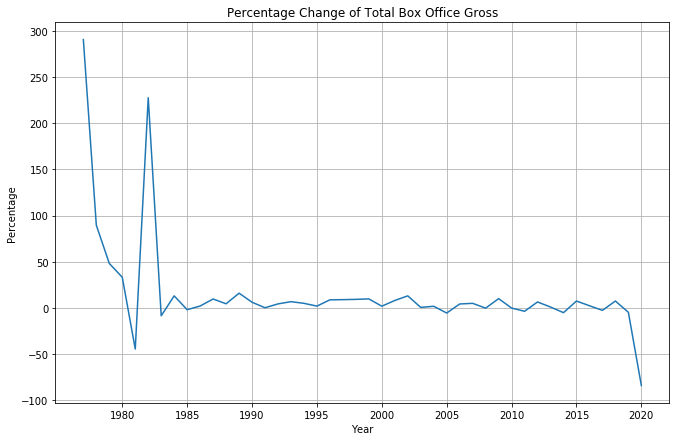

In [8]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['change_in_total_gross(%)'])
ax.set(xlabel='Year',
       ylabel='Percentage',
       title='Percentage Change of Total Box Office Gross',
       xticks=range(1980,2021,5)
      )

ax.grid()
plt.show()

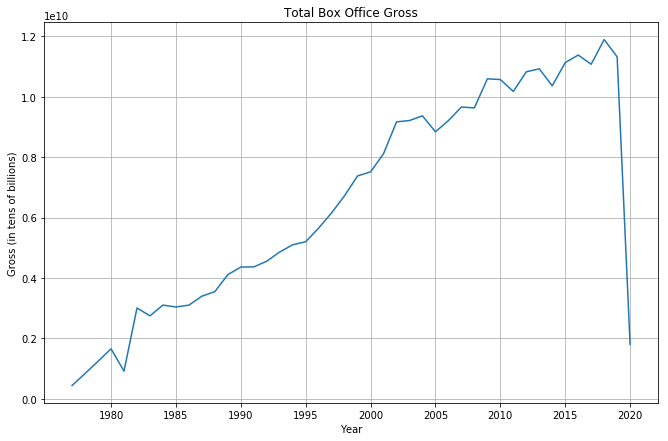

In [9]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['total_gross'])
ax.set(xlabel='Year',
       ylabel='Gross (in tens of billions)',
       title='Total Box Office Gross',
       xticks=range(1980,2021,5),
       yticks=range(0,int(14E9), int(2E9))
      )

ax.grid()
plt.show()

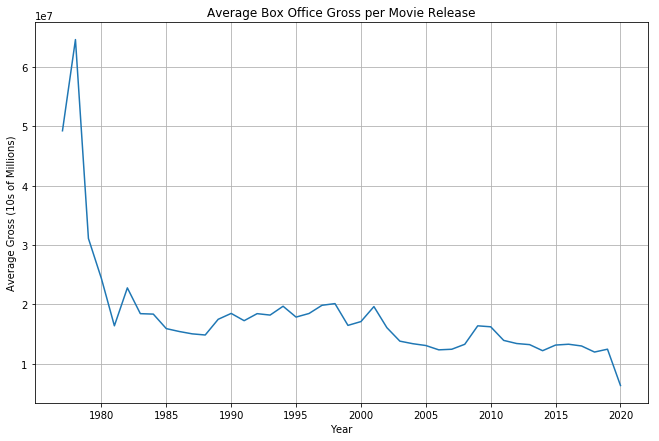

In [10]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['average_gross_per_release'])
ax.set(xlabel='Year',
       ylabel='Average Gross (10s of Millions)',
       title='Average Box Office Gross per Movie Release',
       xticks=range(1980,2021,5)
      )

ax.grid()
plt.show()

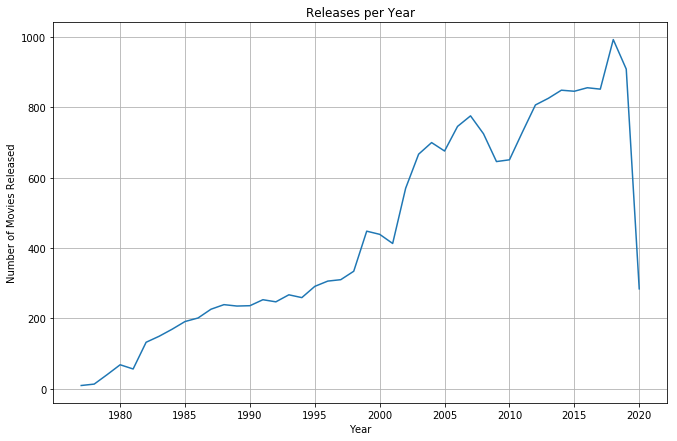

In [11]:
fig, ax = plt.subplots(figsize=(11,7))

ax.plot(movies_df['year'], movies_df['number_of_releases'])
ax.set(xlabel='Year',
       ylabel='Number of Movies Released',
       title='Releases per Year',
       xticks=range(1980,2021,5)
      )

ax.grid()
plt.show()

___

___
Now I want to try to scrape all the movies in each year from 1977 to 2019.

In [105]:
years_to_scrape = range(1977, 2020)

# create a set of empty lists that we will populate with our movie data
running_titles = []
running_tot_grosses = []
running_theaters_per_movie = []
running_release_dates = []
running_year = []

In [106]:
# Scraper
options = Options()
options.headless = True

DRIVER_PATH = '/usr/local/bin/chromedriver'

# set up the driver
driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)

# let's loop through each year
for year_to_scrape in years_to_scrape:

    # Go to the site we want to scrape
    driver.get(f'https://www.boxofficemojo.com/year/{year_to_scrape}/')
    
    # get the total number of entries per year
    entries = len(driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr'))

    # scrape the data we're after
    titles = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[2]/a')
    total_grosses = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[8]')
    theaters_per_movie = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[7]')
    release_dates = driver.find_elements_by_xpath('//*[@id="table"]/div/table[2]/tbody/tr/td[9]')
    
    # get the text from the web elements and save them to our running lists
    running_titles += [title.text for title in titles]
    running_tot_grosses += [total_gross.text for total_gross in total_grosses]
    running_theaters_per_movie += [theaters.text for theaters in theaters_per_movie]
    running_release_dates += [release_date.text for release_date in release_dates]
    running_year += [year_to_scrape for _ in range(entries-1)]
    

# close the driver
driver.quit()

In [107]:
movies_dict = {
    'year' : running_year,
    'title': running_titles,
    'total_gross' : running_tot_grosses,
    'theaters' : running_theaters_per_movie,
    'release_date' : running_release_dates,
}

In [108]:
len(movies_dict['year'])

19356

In [109]:
len(movies_dict['title'])

19356

In [110]:
len(movies_dict['total_gross'])

19356

In [111]:
len(movies_dict['theaters'])

19356

In [112]:
len(movies_dict['release_date'])

19356

In [113]:
movies_df = pd.DataFrame(movies_dict)
movies_df

,year,title,total_gross,theaters,release_date
0,1977,Star Wars: Episode IV - A New Hope,"$307,263,857","1,750",May 25
1,1977,The Deep,"$47,346,365",731,Jun 17
2,1977,The Spy Who Loved Me,"$46,838,673",200,Jul 13
3,1977,"Oh, God!","$41,687,243",198,Oct 7
4,1977,Exorcist II: The Heretic,"$30,749,142",703,Jun 17
...,...,...,...,...,...
19351,2019,Henchmen,"$1,469",3,Dec 7
19352,2019,1945,"$1,006,193",19,Nov 1
19353,2019,Tall Tales from the Magical Garden of Antoon K...,$220,20,Jan 11
19354,2019,Over the Limit,"$3,243",2,Oct 12


In [114]:
movies_df.to_csv('../../Data/Selenium/movies_1977-2020.csv', index=False)